In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser and go to [this page](https://rem123.csc.warwick.ac.uk:8987/module/CH160).<br>
* <b>Step 2</b>: Enter your SCRTP username and password and press the "Start Server" button.<br>
* <b>Step 3</b>: Wait (it could take a few minutes) until the blue blox says "Jupyter notebook server running!". At that point, click on the weblink below said message.<br>
* <b>Step 4</b>: Select the Jupyter Notebook you want to work on. Remember to make a copy of the orginal notebook (which is read only). To do so, in the toolbar on top of the notebook, select File and then Make a Copy <br>
* <b>Step 5</b>: You're all set! <br>
* <b>Step 6</b>: <font color="red">When you are done, remember to click the "Stop Server" button in the launcher web browser tab.</font> Please do, it's really quite important. <br>
<b> Remember: </b> You can access your copy of the Notebook at any time from any device off and on campus by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! <br>
<div/>

# Workshop 5: Numerical Methods

## Introduction

In CH162:Mathematics for chemists you have learnt how to differentiate functions, evaluate definite integrals, and solve differential equations - techniques you will use again and again during your chemistry degree. In all cases, 
we have derived <i>analytical</i> solutions (<i>i.e.</i> the solutions are expressed in terms of a mathematcial function) to the problems at hand. Oftentimes, finding these analytical solutions can be extremely difficult, and in many cases no such analytical solution exists at all. Because of this, we often choose to approximate the solution using <i>numerical methods</i>. This final key skills workshop will teach you how to develop simple programs capable of providing us with these numerical approximations, and builds upon the techniques developed in the past four weeks, including:
<ul>
  <li>loop structures</li>
  <li>defining and using functions</li>
  <li>data plotting</li>
</ul>

### Loading the required python packages
As with all Python programming, the first step is load all of the optional modules we will need using the ``import`` command. For this workshop we will use both the ``matplotlib.pyplot`` module, and NumPy (the fundamental Python package for scientific computing). To save having to type out their full names everytime we use them, we will give these modules the aliases ``plt`` (Matplotlib) and ``np`` (NumPy):

In [6]:
#IMPORT ALL THE THINGS!
import matplotlib.pyplot as plt
import numpy as np

## 1. Differentiation
To differentiate functions numerically, we make direct use of the <i>first principles definition</i> of a derivative:
    $$ $$
    $$f'(x)=\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}$$
    $$ $$    
where $f(x)$ and $f'(x)$ are our original function and its derivative, respectively, and $h$ is the stepsize (which we called $\Delta x$ in the CH162:Mathematics for chemists notes). From this equation you can see that in order to calculate a derivative numerically, all we need is the defintion of the function $f(x)$ itself, and a value for the step size - numerical differentiation just requires that we are able to write functions!

As a very simple example lets calculate the derivative of $y=x^{4}$ at $x=1.3$. The analytical solution $(f'(x)=4x^{3})$ tells us that the answer should be 8.788. How well will our numerical approxiation perform?

### Step (i)

The first step is to define our function $(f(x)=x^{4})$ using python:

In [7]:
#WRITE A PYTHON FUNCTION WHICH READS IN A VALUE (x) AND RETURNS THE VALUE x^4 

def x_pwr4(x): #'x_pwr4' is called using a number (x) as an argument
    return x**4      #and spits out the value of x raised to the fourth power (x^4)

<div class=warn>

### <font>Task 1:</font>
Use the function ``x_pwr4()`` defined above to evaluate $x^{4}$ when $x=3.9$

In [8]:
#TASK 1 ANSWER:
x_pwr4(3.9)

231.34409999999997

### Step (ii)

We can now use this function to calculate the deriviative of $x^{4}$ evaluated at $x=1.3$. The only choice we have to make is what value of $h$ should we use? As a first test lets set $h=1$:

In [9]:
#NUMERICALLY CALCULATING A DERIVATIVE USING A STEP SIZE OF h=1

#Define a variable 'h' which represents our step size
h=1

#Use the function 'x_pwr4()' defined above with the step size to numerically approximate the derivative

(x_pwr4(1.3+h)-x_pwr4(1.3))/h #f'(x)=[f(x+h)-f(x)]/h

25.12799999999999

Clearly this is nowhere near the correct value! What has gone wrong? 

The first-principles definition of a derivative is taken in the limit of $h$ approaching zero. This suggests to us that if we decrease the value of $h$ (and thus approach the limit of $h=0$), our numerical answer should become more accurate.

<div class=warn>

### <font>Task 2:</font>
Repeat the above calculation using step sizes of $h=0.1,\,0.01,\,0.001,\,0.0001$, and $0.00001$. Try to include a loop in your code which allows you to get all five values from a single execution of your program, rather than running your code five separate times. 

In [10]:
#TASK 2 ANSWER:
h=0.1
for i in range(5):
    numerical=(x_pwr4(1.3+h)-x_pwr4(1.3))/h
    print('h=',h,'  f`(x)=',numerical)
    h/=10

h= 0.1   f`(x)= 9.85500000000001
h= 0.01   f`(x)= 8.889921000000012
h= 0.001   f`(x)= 8.798145200998864
h= 0.0001   f`(x)= 8.789014051999722
h= 1e-05   f`(x)= 8.788101400547532


As expected, as $h$ decreases, the accuracy of the result increases. <b>Note:</b> if you make $h$ too small (below $\approx 10^{-8}$), the answer will begin to get <i>less</i> accurate - this is due to how Python handles very small numbers.

The code below plots the numerical approximation (using the [Bokeh](https://bokeh.pydata.org/en/latest/) package rather than Matplotlib) for the derivative of $y=x^{4}$ over a range of <i>x</i>-values, and compares the answer to the analytical solution. By adjusting the slider beneath the plot the value of $h$ can be changed with the plot updating dynamically (you may need to execute the code cell twice).

In [11]:
#DAN SHOWING OFF HIS FANCY PLOTTING SKILLS

from bokeh.plotting import figure, output_file, show
from ipywidgets import interact,FloatSlider
from bokeh.io import output_notebook,push_notebook
output_notebook()

def numDiff(x,h):
    return (x_pwr4(x+h)-x_pwr4(x))/h

x=np.linspace(-1.5,1.5,64)

y=x_pwr4(x)
y_diff=numDiff(x,0.51)


fig=figure(plot_height=400,plot_width=600,y_range=(-15,15))
fig.line(x,4*x**3,legend='4x^3',line_width=4, color='#D9514E')
fig.xaxis.axis_label='x'
fig.yaxis.axis_label='y'
diff=fig.circle(x,y_diff,color='#2A2B2D',legend='Numerical approximation',size=8,alpha=0.5)
fig.legend.location = 'top_left'
#show(fig)

def plot(h):
    
    diff.data_source.data['y']=numDiff(x,h)
    push_notebook()
    

show(fig,notebook_handle=True)    
interact(plot,h=FloatSlider(min=0.005, max=1.0,value=0.5, step=0.005,label='Step'))

Loading BokehJS ...

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0, min=0.005, step=0.005), Output()), _dom…

<function __main__.plot(h)>

## 2. Numerical Integration

### Integration is hard...

<img src="./STUFF/integration_hurts_my_head.png" width="700">

The methods taught to you in CH162 are not able to solve many of the integrals commonly encountered in physical chemistry (at least not easily), instead we often need to make extensive use of [tables](https://dlmf.nist.gov/4.10) of [standard](https://dlmf.nist.gov/4.26) [integrals](https://dlmf.nist.gov/4.40) to get analytical solutions. 

An alternative approach is to instead look for approximate solutions to our integrals using numerical methods. Since this workshop is all about using Python, that is the approach we shall take here.  

### The theory behind numerical integration
When we solve a definite integral we are calculating the area under a curve. To achieve this numerically we are going to perform a Reimann sum (named after 19th century German mathematician [Bernhard Riemann](https://en.wikipedia.org/wiki/Bernhard_Riemann)). In this approximation, we partition (<i>i.e.</i> split) the region under the curve into a series of regular shapes - <i>e.g.</i> rectangles or trapezoids - that together approximate the shape of the curve. We then calculate the area of each of these individual shapes, and finally add all of these areas together to approximate the total area under the curve. 

The accuracy of this approximation is increased by partitioning the area under the curve more finely. For example, the figure below shows the effect of dividing the area under the red curve into 10, 20, 40, and 80 rectangular regions (grey).

<img src="./STUFF/NumIntRegions.png" width="700">

### How will our numerical integration algorithm work?
From the background information presented above, you will hopefully already have some ideas about how to write code capable of numerically integrating a mathematical function. As with all coding, there are several ways we can achieve this. 

To begin with we shall keep things as simple as possible, and divide our integration region into a series of $N$ rectangles, all of which are of equal width (which we shall call $h$). Further, the rectangles will make contact with the curve on their left-hand side (the so-called left Riemann sum), as illustrated in the above diagram. We can break our integration code down into a series of steps

1. Define our mathematical function $f(x)$  using Python
2. Partition the integration region into $N$ pieces, each of width $h$ <img src="./STUFF/NumIntAlgorithm_Step2.png" width="350">
3. Evaluate $f(a)$ (*e.g.* $f(x)$ evaluated at $x=a$) and calculate the area of the first rectangle - $Area(1)=f(a)\cdot h$ <img src="./STUFF/NumIntAlgorithm_Step3.png" width="350">
4. Evaluate $f(a+h)$ and calculate the area of the second rectangle - $Area(2)=f(a+h)\cdot h$ <img src="./STUFF/NumIntAlgorithm_Step4.png" width="350">
5. Keep moving along the $x$-axis until the area of all $N$ rectangles have been calculated <img src="./STUFF/NumIntAlgorithm_Step5.png" width="350">
6. Cacluate the total area:

$$\textrm{Total Area}=\sum_{n=1}^{N}\textrm{Area}(n)\approx\int_{a}^{b}f(x)\,\mathrm{d}x$$




### Putting it into practice
As an example problem, we shall use Python to numerically evaluate the following integral:

$$\int_{-1.5}^{2}\left(x^{4}-3x^{2}\right)\,\textrm{d}x$$

That is, find the area of the grey shaded region in the plot below:
<img src="./STUFF/IntegralFunc.png" width="600">
    
If our code works correctly, it should return an answer close to the analytical (<i>i.e.</i> exact) value of -3.45625. 

### Step 1: Define the mathematical function in Python

<div class=warn>

### <font>Task 3:</font>
Write a Python function ``OurFunc(x)``, which when provided with a value for $x$ returns $f(x)= x^{4}-3x^{2}$. If you are unsure how to do this, look at how the function ``x_pwr4()`` was defined in section 1.

Test your code using $x=0.5$, which should return a value of $f(0.5)=-0.6875$

In [12]:
#TASK 3 SOLUTION
def OurFunc(x):
    return x**4-3*x**2

OurFunc(0.5)

-0.6875

### Step 2: Partition the integration region into $N$ pieces, each of width $h$
To make our code as flexible as possible, we are going to allow the user to define the limits of the integration region ($a$ and $b$) and the number of rectangles used to approximate the integral. Using these three values as inputs, the width of each rectangle, $h$, can be calculated as:
$$h=\frac{b-a}{N}$$

<div class=warn>

### <font>Task 4:</font>
Write a Python function ``Partition(a,b,N)``, which will divide the region between $a$ and $b$ into $N$ equal width sections, and return the width $h$ of each section

Test your code using $a=-5$, $b=-2$, and $N=8$ which should return a value of $h=0.375$  (*i.e.* when you type ``Partition(-5, -2, 8)`` into a code cell, it will output a value of 0.375) 

In [13]:
#TASK 4 ANSWER:
def Partition(a,b,N):
    return (b-a)/N


Partition(-5,-2,8)

0.375

### Steps 3-5: Calculate and store the areas of the rectangles - the tedious way!
The easiest way to do this is to explicitly calculate the area of each rectangle in turn. For instance, we could run the following code...
```python
#Define the integration limits (a & b) and the number of partitions N
a=-1.5
b=2
N=5

#Divide the integration region into 5 regions between -1.5 and 2, and calculate the width of each section
h=Partition(a, b, N)

#Area of rectangle 1 = f(a)*h
Area1=OurFunc(a)*h

#Area of rectangle 2 = f(a+h)*h
Area2=OurFunc(a+h)*h

#Area of rectangle 3 = f(a+2h)*h
Area3=OurFunc(a+2*h)*h

#Area of rectangle 4 = f(a+3h)*h
Area4=OurFunc(a+3*h)*h

#Area of rectangle 5 = f(a+4h)*h
Area5=OurFunc(a+4*h)*h

#Sum the rectangle areas to yield the total area
TotalArea=Area1+Area2+Area3+Area4+Area5

print(TotalArea)
```
Provided your ``OurFunc(x)`` and ``Partition(a,b,N)`` functions are defined correctly, this approach will work. Unfortunately the answer returned will be  hugely inaccurate (the above code returns a value of -4.47446... for our integral - run it in a code cell to see for yourself). This is because the accuracy of the numerical integration method increases as the value of $N$ becomes larger. 

### Steps 3-5: Calculate and store the areas of the rectangles - the lazy persons way!
While we could simply extend the above method to use more regions, and hence obtain a more accurate result, it makes more sense to use a loop and automate things (really, the whole point of coding is to automate tedious/complicated things). Our task, therefore, is to take what we have done above and turn it into a loop.

In the above code, we see that we repeatedly make use of the ``OurFunc(x)`` function, each time calling it with a different value for $x$, therefore we need to write a loop which will automatically increase $x$ by the value of $h$ on each pass, and then calculate and store the area of each rectangle.   

<div class=warn>

### <font>Task 5:</font>
The code below is currently incomplete. Finish the loop structure to make it work. Don't forget to include the range you want to run the loop over, and finish the return statement so as to output the total area. 

<b>(i)</b> Check your code by calling ``Integrate(-1.5, 2, 5)`` which will return a value of -4.47446... if it is working correctly.  

<b>(ii)</b> Calculate the value of the numerical integral when the area under the curve is divided into 5000 regions

<b>Useful commands</b>:

<code>arrayName[i]=someValue</code> - stores the value ``someValue`` (can be a number or a string) in the array ``arrayName`` at position ``i`` 
    
<code>np.sum(arrayName)</code> - returns the sum of all elements of the array ``arrayname``


In [42]:
#TASK 5 ANSWER:
#Finish the loop in the code below

def Integrate(a,b,N):
    #Calculate the width of each rectangle
    h=Partition(a,b,N)
    
    #prepare a numpy array of length N for storage of individual rectangle areas - each element initially 
    #has a value of 0, which needs to be replaced by the calculated areas using area[i]=calculatedValue
    area=np.zeros(N)
    
    #Calulates the area of each of the N rectangles, and stores them in the preprepared array 
    for i in range(N):
        x=a+i*h
        area[i]=OurFunc(x)*h 
    
    #np.sum(array) adds up all the elements of an array - therefore provides the total area
    return np.sum(area)
print("Numerical area returned using 5 partitions =",np.around(Integrate(-1.5,2,5),decimals=5))
print("Mumerical area returned using 5000 partitions = ", np.around(Integrate(-1.5,2,5000),decimals=5))


Numerical area returned using 5 partitions = -4.47447
Mumerical area returned using 5000 partitions =  -3.45824


### How can we improve our algorithm?
The algorithm we have just written is by no means the only way we can numerically integrate functions. While it has the advantage of being very simple, our algorithm requires that we partition our integration regions into a large number of regions in order to produce an accurate result (in the current problem, <i>ca.</i> 3000 regions are needed before the answer in within 0.1% of the true value). There are several other algorithms we could use, and many of these converge far more rapidly - <i>i.e.</i> they don't require the integration region to be divided into as many regions to return an accurate value.

Three examples of enhanced numerical integration algorithms are the [midpoint rule](https://en.wikipedia.org/wiki/Riemann_sum#Midpoint_rule), [Trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule), and [Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule). As can be seen in the plot below, for our problem they all converge on the correct answer far more rapidly than the left Reimann sum. The numerical integration code we wrote above can be easily adapted to perform a midpoint rule or trapezoidal rule integration, and implementation of Simpson's rule is only slightly more challenging.

<img src="./STUFF/NumIntMethodComparison.png" width="800">

<div class=warn>

### <font>Homework task 1</font>
Adapt the numerical integration code to perform midpoint rule integration and trapezoid rule integration of our function.

As an extra challenge, see if you can write code capable of performing a Simpson's rule integration.

<b>Note</b>: N must be even for Simson's rule to work

### Code checking
If your codes are correct, setting ``a=-1.5``, ``b=2``, and ``N=32`` should produce the following values (recall that the analytical solution is -3.45625 exactly):</p>
Midpoint rule: -3.46844...<br>
Trapezoidal rule: -3.43184... <br>
Simpson's rule: -3.45618...</p>

In [44]:
#HOMEWORK TASK 1 ANSWER:

#Midpoint rule
def MidReiSum(a,b,N):
    #Calculate the width of each rectangle
    h=Partition(a,b,N)
    
    #prepare a numpy array of length N for storage of individual rectangle areas - each element initially 
    #has a value of 0, which needs to be replaced by the calculated areas using area[i]=calculatedValue
    area=np.zeros(N)
    
    #Calulates the area of each of the N rectangles, and stores them in the preprepared array 
    for i in range(N):
        #x=a+(i+0.5)*h
        area[i]=OurFunc(a+(i+0.5)*h)*h 
    
    #np.sum(array) adds up all the elements of an array - therefore provides the total area
    return np.sum(area)

# Trapezoidal rule
def TrapSum(a,b,N):
    #Calculate the width of each rectangle
    h=Partition(a,b,N)
    
    #prepare a numpy array of length N for storage of individual rectangle areas - each element initially 
    #has a value of 0, which needs to be replaced by the calculated areas using area[i]=calculatedValue
    area=np.zeros(N)
    
    for i in range(N):
        x_1=a+i*h
        x_2=a+((i+1)*h)
        area[i]=h*((OurFunc(x_1)+OurFunc(x_2))/2)
        
    #np.sum(array) adds up all the elements of an array - therefore provides the total area
    return np.sum(area)

#Simpson's rule
def SimpsRule(a,b,N):
    #Calculate the width of each rectangle
    h=Partition(a,b,N)
    
    #prepare a numpy array of length N for storage of individual rectangle areas - each element initially 
    #has a value of 0, which needs to be replaced by the calculated areas using area[i]=calculatedValue
    area=np.zeros(N)
    
    #Simpsons rule requires that N be even
    i=1
    while i < N:
        area[i]=h/3*((OurFunc(a+(i-1)*h))+(4*OurFunc(a+(i)*h))+(OurFunc(a+(i+1)*h)))
        i+=2
    #np.sum(array) adds up all the elements of an array - therefore provides the total area
    return np.sum(area)

print('Midpoint rule result =',np.around(MidReiSum(-1.5,2,32),decimals=5))
print('Trapezoidal rule result =', np.around(TrapSum(-1.5,2,32),decimals=5))
print("Simpson's rule result =", np.around(SimpsRule(-1.5,2,32),decimals=5))


Midpoint rule result = -3.46845
Trapezoidal rule result = -3.43184
Simpson's rule result = -3.45618


## 3. Solving Differential Equations Numerically
The final numerical approximation method we shall discuss is the forward Euler method for solving differential equations. This was first reported in 1768 by [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) and is the simplest numerical method for solving first-order differential equations (<i>i.e.</i> we don't ever need to calculate the analytical solution) with given intitial values.

### The theory
A general first-order differential equation can be written in the form:
    $$\frac{\mathrm{d}y}{\mathrm{d}x}=f(x,y)$$
    
There are an infinite number of solutions to this differential equation depending upon the initial values of $x$ and $y$. In order to determine a <i>specific solution</i>, we also need to specify these <i>initial values</i>:
    $$y(x_{0})=y_{0}$$

Once we have these initial values ($x_{0},\,y_{0}$), we can use an iterative procedure to generate all subsequent ($x_{n},\,y_{n}$) pairs:
   $$\begin{align*}
            x_{n+1}&=x_{n}+h\\
            y_{n+1}&=y_{n}+hf(x_{n},y_{n})
       \end{align*}$$
       
where, as with the numerical differentiation and integration examples above, the parameter $h$ is a user-defined step size which plays a crucial role in the overall accuracy of the method. 

The [derivation of this result](http://calculuslab.deltacollege.edu/ODE/7-C-1/7-C-1-h-a.html) isn't terribly important to us, but is fairly easy to understand and well worth looking at when you have the time.
### The algorithm
We are going to use the forward Euler method to investigate the time-dependent concentrations of molecular species in a typical first-order kinetic scheme:
$$A\xrightarrow{k} B$$

where $A$ and $B$ are the reactant and product, respectively, and $k$ is the first-order rate coefficient.

Assuming the initial population of species $B$ is zero initially, the two differential equations describing the evolution of $[A]$ and $[B]$ are:
    $$\begin{align*}
        \frac{\mathrm{d}[A]}{\mathrm{d}t}&=-k[A]\\[6pt]
        \frac{\mathrm{d}[B]}{\mathrm{d}t}&=k[A]
    \end{align*}$$
    
Which have analytical solutions:
    $$\begin{align*}
        [A]_{t}&=[A]_{0}e^{-kt}\\[6pt]
        [B]_{t}&=[A]_{0}\left(1-e^{-kt}\right)
        \end{align*}$$ 
        
For our example problem, we shall set $[A]_{0}=5\textrm{ mol dm}^{-3}$ and $k=0.8\textrm{ s}^{-1}$, and if everything works correctly, our numerical algorithm should return values for the time dependent concentrations of $[A]$ and $[B]$ which sit on the following curves:
<img src="./STUFF/TimeDepConc.png" width="800">


### Step 1: Define the differential equations in python
The first step is to define our two differential equations describing the time-dependent populations of $A$ and $B$ using python. For the differential equation modelling the rate of change of $[A]$ with respect to time $\left(\frac{\mathrm{d}[A]}{\mathrm{d}t}=-k[A]\right)$, we can write the following function:

In [16]:
#TIME DEPENDENT CONCENTRATION OF SPECIES A
#Note that the populations of A and B only depend upon a single variable ([A]), and not upon the variables [B] or t. 
#Therefore f(t, [A], [B])=f([A])

#d[A]/dt=-k[A]
def dA_dt(A):
    return -k*A #the value of k will be defined elsewhere in the code

<div class=warn>

### <font>Task 6:</font>
Write a python function ``dB_dt(A)`` describing the differential equation controlling $[B]_{t}$

In [17]:
#TASK 6 ANSWER:

#d[B]/dt=k[A]
def dB_dt(A):
    return k*A #the value of k will be defined elsewhere in the code

### Step 2: Define the initial values, and set up lists for storage of $t$, $[A]_{t}$, and $[B]_{t}$ values
Because we are solving these differential equations in an iterative manner, we need to store the returned values of $t$, $[A]_{t}$, and $[B]_{t}$ at each time step. Lists provide us with a convenient method of doing this. 

We shall begin by creating three lists (``concA``, ``concB``, and ``t_step``), each with a single number. These three numbers define our initial values ($[A]_{0}=5$, $[B]_{0}=$, and $t_{0}=0$):

In [18]:
#INITIALISE LISTS FOR STORAGE OF t, [A]_t, [B]_t - NOTE: THIS MUST BE RUN EACH TIME!
concA=[5]
concB=[0]
t_step=[0]

Every iteration of our code will generate new values for $t$, $[A]$, and $[B]$, therefore we will need to add these values to the ends of their respective lists. This can be achieved using the code:
```python
listName.append(value)
```
where 'listName' is the name of your list (<i>i.e.</i> t_step, concA, or concB), and 'value' is the number you are adding to the end.

### Step 3: Iterate through the algorithm and store the values - the tedious way!
Using the forward Euler algorithm outlined above, we can calculate and store the second set of $t$ and $[X]$ values:

#### (i) $t$
The value of $t$ is increased by our chosen step size $h$ (<i>i.e.</i>, $t\rightarrow t+h$). Our initial value for $t$ is stored as the first element of the list 't_step' (<i>i.e.</i>,``t_step[0]``), therefore we create and store the second value for $t$ using
```python
t_step.append(t_step[0]+h)
```

#### (ii) $[A]$
The forward Euler algorithm tells us that
    $$[A]_{n+1}=[A]_{n}+h\cdot f(t_{n},[A]_{n})$$

where the function $f(t_{n},[A]_{n})=-k[A]_{n}$ has previously been defined as ``dA_dt(A)``. Therefore the second value for $[A]_{t}$ is created and stored using
```python
concA.append(concA[0]+h*dA_dt(concA[0]))
```

#### (iii) $[B]$
Similarly, the second value for $[B]_{t}$ is calculated and stored using the code
```python
concB.append(concB[0]+h*dB_dt(concA[0]))
```

We could calculate each iteration of the Euler algorithm this way using code such as that below (where we have chosen a step size of $h=1\textrm{ s}$):
```python
#Define the value of the rate coefficient (k), and the step size (h)
k=0.8 #units = s^-1
h=1.0 #units = s

#First iteration: t=1.0 s
t_step.append(t_step[0]+h)
concA.append(concA[0]+h*dA_dt(concA[0]))
concB.append(concB[0]+h*dB_dt(concA[0]))

#Second iteration: t=2.0 s
t_step.append(t_step[1]+h)
concA.append(concA[1]+h*dA_dt(concA[1]))
concB.append(concB[1]+h*dB_dt(concA[1]))

#Third iteration: t=3.0 s
t_step.append(t_step[2]+h)
concA.append(concA[2]+h*dA_dt(concA[2]))
concB.append(concB[2]+h*dB_dt(concA[2]))

#Fourth iteration: t=4.0 s
t_step.append(t_step[3]+h)
concA.append(concA[3]+h*dA_dt(concA[3]))
concB.append(concB[3]+h*dB_dt(concA[3]))

#Final iteration: t=5.0 s
t_step.append(t_step[4]+h)
concA.append(concA[4]+h*dA_dt(concA[4]))
concB.append(concB[4]+h*dB_dt(concA[4]))

```
The results from this code are plotted below (as points) and compared to the true analytical solutions (lines) 
<img src="./STUFF/EulerLargeStep.png" width="800">

### Step 3: Iterate through the algorithm and store the values - the lazy persons way!
Loops, the answer is loops.

As with all the numerical methods covered in this workshop, the choice of step size is critical to the accuracy of the approach. The choice of $h=1$s made above is too large to get satisfactory results, so we need to reduce it. Rather than calculate each iteration by hand, we should also include a loop in our code.

<div class=warn>

### <font>Task 7:</font>
Use the forward Euler algorithm to numerically model our system over the time range $0\textrm{ s}\leq t \leq5\textrm{ s}$ using a step size of $h=0.05$s. 

Plot the results, and compare them to the analytical solutions. If your code works correctly, your plot should look like:
<img src="./STUFF/EulerTask.png" width="600">

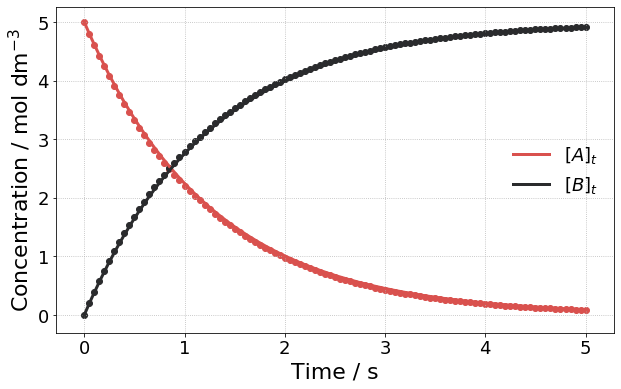

In [19]:
#TASK 7 ANSWER:
#REINITIALISE LISTS FOR STORAGE OF t, [A]_t, [B]_t - NOTE: THIS MUST BE RUN EACH TIME!
concA=[5]
concB=[0]
t_step=[0]

k=0.8 #units = s^-1
h=0.05 #units = s

#Loop implementing Euler algorithm
for i in range(100):
    t_step.append(t_step[i]+h)
    concA.append(concA[i]+h*dA_dt(concA[i]))
    concB.append(concB[i]+h*dB_dt(concA[i]))

#Plot the results
plt.figure(figsize=(10,6))

#Numerical results
plt.scatter(t_step,concA,c='#D9514E')
plt.scatter(t_step,concB,c='#2A2B2D')

#Analytical results
t=np.linspace(0,5,128)
A=5*np.exp(-0.8*t)
B=5*(1-np.exp(-0.8*t))

plt.plot(t,A,c='#D9514E',lw=3,label='$[A]_{t}$')
plt.plot(t,B,c='#2A2B2D',lw=3,label='$[B]_{t}$')

#Make the plot pretty
plt.ylabel('Concentration / mol dm$^{-3}$',fontsize=22)
plt.xlabel('Time / s',fontsize=22)
plt.grid(linestyle='dotted',c='0.7')
plt.legend(frameon=False,fontsize=18)
plt.tick_params(labelsize=18)
plt.show()

<div class=warn>

### <font>Homework task 2:</font>
Use the forward Euler algorithm to model the follwing kinetic scheme:
$$A\xrightarrow{k_{1}} B\xrightarrow{k_{2}}C$$

Assuming the initial populations of species $B$ and $C$ are zero initially, the three differential equations describing $[A]_{t}$, $[B]_{t}$, and $[C]_{t}$ are:
    $$\begin{align*}
        \frac{\mathrm{d}[A]}{\mathrm{d}t}&=-k_{1}[A]\\[6pt]
        \frac{\mathrm{d}[B]}{\mathrm{d}t}&=k_{1}[A]-k_{2}[B]\\[6pt]
        \frac{\mathrm{d}[C]}{\mathrm{d}t}&=k_{2}[B]
    \end{align*}$$

Plot the time-dependent concentrations of $[A]$, $[B]$, and $[C]$ over the time range $0\textrm{ ns}\leq t \leq10\textrm{ ns}$, using the following parameters:
* $[A]_{0}=2\textrm{ mol dm}^{-3}$; $[B]_{0}=[C]_{0}=0\textrm{ mol dm}^{-3}$
* $k_{1}=3.0 \textrm{ ns}^{-1}$
* $k_{2}=0.4 \textrm{ ns}^{-1}$
* $h=0.1\textrm{ ns}$

Compare your results to the analytical solutions: 
    $$\begin{align*}
        [A]_{t}&=[A]_{0}e^{-k_{1}t}\\[6pt]
        [B]_{t}&=[A]_{0}\frac{k_{1}}{k_{2}-k_{1}}\left(e^{-k_{1}t}-e^{-k_{2}t}\right)\\[6pt]
        [C]_{t}&=[A]_{0}\left(1+\frac{k_{1}e^{-k_{2}t}-k_{2}e^{-k_{1}t}}{k_{2}-k_{1}}\right)
        \end{align*}$$ 
        

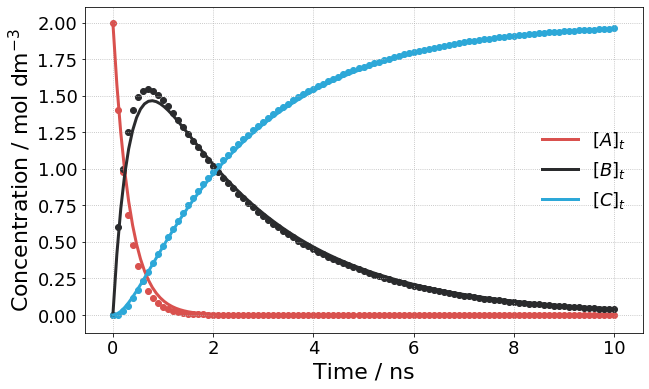

In [46]:
#HOMEWORK TASK 2 ANSWER:

#Define three differential equations d[A]/dt, d[B]/dt and d[C]/dt. Use prefix HT2 to distinguish functions 
#from those defined for the earlier problem
def HT2_dA_dt(A):
    return -k1*A

def HT2_dB_dt(A,B):
    return (k1*A)-(k2*B)

def HT2_dC_dt(B):
    return k2*B

#Set up lists for storage of concentrations and times, initial concentrations A0=1, B0=C0=0
t_step=[0]
HT2_concA=[2]
HT2_concB=[0]
HT2_concC=[0]

#set rate coefficients and timestep
k1=3 #units = ns^-1
k2=0.4 #units = ns^-1
h=0.1 #units = ns

#Loop implementing Euler algorithm
for i in range(100):
    t_step.append(t_step[i]+h)
    HT2_concA.append(HT2_concA[i]+h*HT2_dA_dt(HT2_concA[i]))
    HT2_concB.append(HT2_concB[i]+h*HT2_dB_dt(HT2_concA[i],HT2_concB[i]))
    HT2_concC.append(HT2_concC[i]+h*HT2_dC_dt(HT2_concB[i]))

#Plot the results
plt.figure(figsize=(10,6))

#Numerical results
plt.scatter(t_step,concA,c='#D9514E')
plt.scatter(t_step,concB,c='#2A2B2D')
plt.scatter(t_step,concC,c='#2DA8D8')

#Analytical solutions
t=np.linspace(0,10,128)
A_t=concA[0]*(np.exp(-k1*t))
B_t=concA[0]*((k1/(k2-k1))*(np.exp(-k1*t)-np.exp(-k2*t)))
C_t=concA[0]*(1+(k1*np.exp(-k2*t)-k2*np.exp(-k1*t))/(k2-k1))

plt.plot(t,A_t,c='#D9514E',lw=3,label='$[A]_{t}$')
plt.plot(t,B_t,c='#2A2B2D',lw=3,label='$[B]_{t}$')
plt.plot(t,C_t,c='#2DA8D8',lw=3,label='$[C]_{t}$')

#Make the plot pretty
plt.ylabel('Concentration / mol dm$^{-3}$',fontsize=22)
plt.xlabel('Time / ns',fontsize=22)
plt.grid(linestyle='dotted',c='0.7')
plt.legend(frameon=False,fontsize=18)
plt.tick_params(labelsize=18)
plt.show()